<a href="https://colab.research.google.com/github/ParishaRaja/Deep_Learning_Projects/blob/main/Handdigit_Classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Raja Parisha Viralbhai
# Data Science (semester : 7)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Define a simple neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Load the MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 221065088.77it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41132663.44it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 70380007.09it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 909897.73it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Initialize the network, loss function, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [ ]:
# Training the network
for epoch in range(80):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(-1, 28*28)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1, Loss: 0.3827482771416505
Epoch 2, Loss: 0.36745474154949187
Epoch 3, Loss: 0.3545322495897611
Epoch 4, Loss: 0.34801730860273045
Epoch 5, Loss: 0.34232550036708514
Epoch 6, Loss: 0.336364124896129
Epoch 7, Loss: 0.33033794887065887
Epoch 8, Loss: 0.3276530142058929
Epoch 9, Loss: 0.32262267466584843
Epoch 10, Loss: 0.32176760486165684
Epoch 11, Loss: 0.31650008604923885
Epoch 12, Loss: 0.3136925379812717
Epoch 13, Loss: 0.3104145516594251
Epoch 14, Loss: 0.30840427128076553
Epoch 15, Loss: 0.3060502740869919
Epoch 16, Loss: 0.3035499785780907
Epoch 17, Loss: 0.3020781704246998
Epoch 18, Loss: 0.30185084938307605
Epoch 19, Loss: 0.29866217698951564
Epoch 20, Loss: 0.29817815843224527
Epoch 21, Loss: 0.2967836026052634
Epoch 22, Loss: 0.2958010527471701
Epoch 23, Loss: 0.29533725331326327
Epoch 24, Loss: 0.29309583669801553
Epoch 25, Loss: 0.29279425776600837
Epoch 26, Loss: 0.2916561033387979
Epoch 27, Loss: 0.29091978848377864
Epoch 28, Loss: 0.2896301805446545
Epoch 29, Loss:

In [ ]:
#Evaluation on the test set
correct = 0
total = 0
y_pred = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(-1, 28*28)
        outputs = net(images)
        predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.tolist())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


Accuracy of the network on the 10000 test images: 90.73%


In [ ]:
'''
correct = 0
total = 0
y_pred = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(-1, 28*28)
        outputs = net(images)
        predicted = torch.max(outputs.data, 1)[1]  # Extract the tensor indices
        y_pred.extend(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')
'''

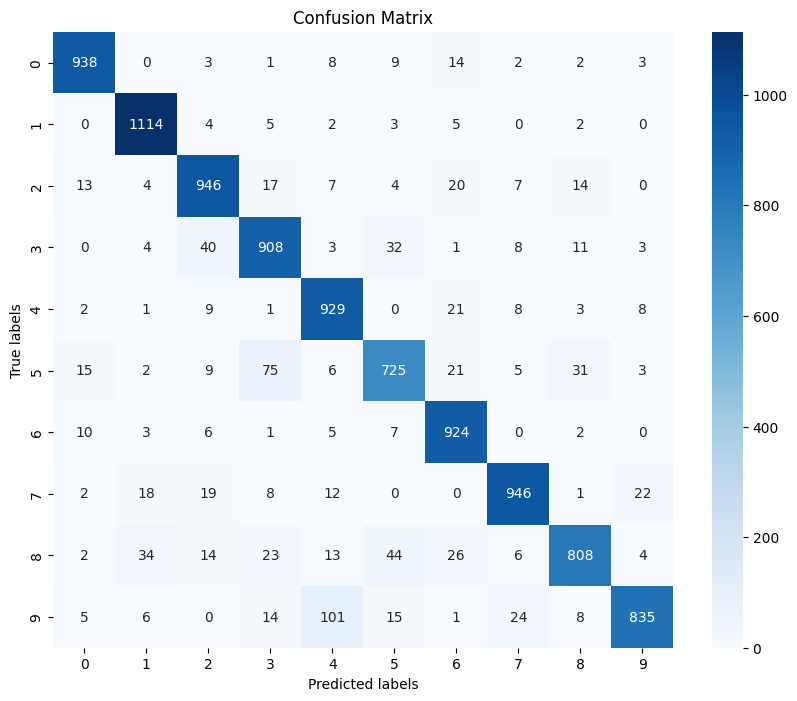

In [ ]:
# Creating and plotting the confusion matrix
conf_matrix = confusion_matrix(testset.targets, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()